In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import sys
sys.path.append('../')
from performance.performance_function import performance_analysis
sys.path.append('../../')
from strategy_formulation.strategy.tilted_mean_reversion_strategy import MeanReversion
from strategy_formulation.research.stock_info.stock_info import sap500_tickers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tickers_range = [0,10]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


No Data foound for ticker BRK.B in the given date range


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


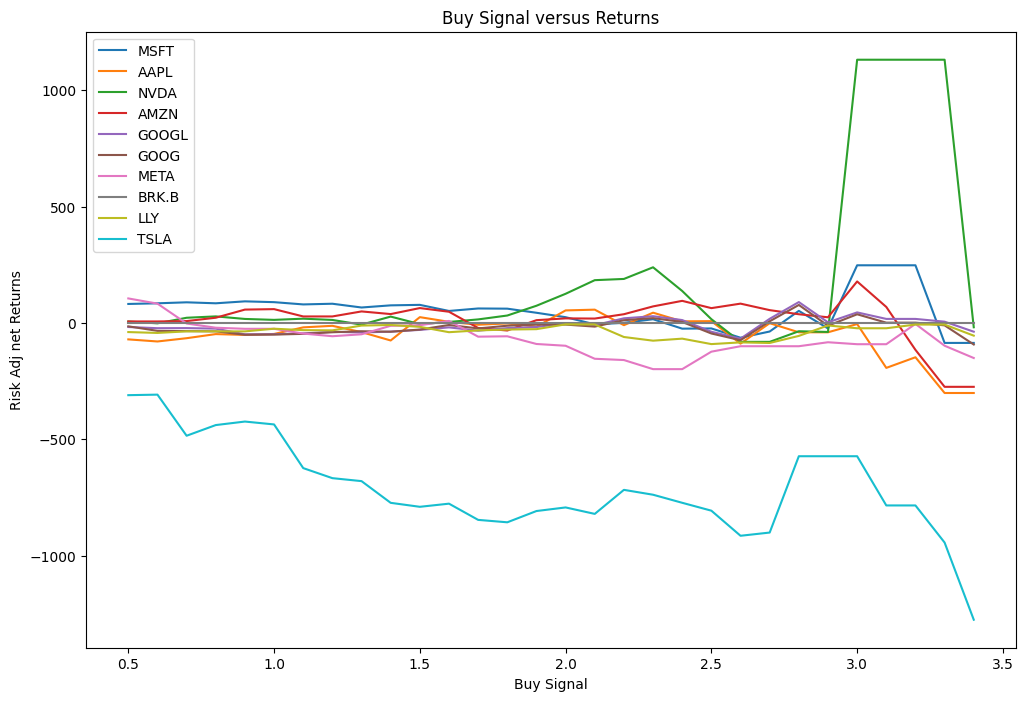

In [4]:
period = ['2010-01-01', '2015-01-01', 100]
tickers = sap500_tickers(tickers_range[0],tickers_range[1])
sell_signal_range = [0.5,3.5,0.1]

plt.figure(figsize=(12,8))
plt.xlabel('Buy Signal')
plt.ylabel('Risk Adj net Returns')
plt.title('Buy Signal versus Returns')

for ticker in tickers:
    ticker_name = MeanReversion(ticker)
    plotted_sell_signal = np.arange(sell_signal_range[0], sell_signal_range[1], sell_signal_range[2])
    plotted_risk_adj_net_returns = []
    for sell_range in np.arange(sell_signal_range[0], sell_signal_range[1], sell_signal_range[2]):
        result = ticker_name.tilted_mean_reversion(period, buy_range = sell_range, graph = False, analysis = False)
        plotted_risk_adj_net_returns.append(result['Strat risk-adj % increase'] - result['B&H % increase'])
    plt.plot(plotted_sell_signal, plotted_risk_adj_net_returns, label = ticker)
plt.legend()
plt.show()

In [5]:
plt.savefig('my_graph.png')

<Figure size 640x480 with 0 Axes>